In [4]:
%matplotlib inline

In [6]:
import skimage.io
import os
img = skimage.io.imread('images' + os.sep + 'stinkbug.png')

# Histogram and Histogram Equalization

An image histogram is a type of histogram that acts as a graphical representation of the tonal distribution in a digital image.[1] It plots the number of pixels for each tonal value. By looking at the histogram for a specific image a viewer will be able to judge the entire tonal distribution at a glance.

"This method usually increases the global contrast of many images, especially when the usable data of the image is represented by close contrast values. Through this adjustment, the intensities can be better distributed on the histogram. This allows for areas of lower local contrast to gain a higher contrast. Histogram equalization accomplishes this by effectively spreading out the most frequent intensity values."

In [5]:
import matplotlib
import matplotlib.pyplot as plt
import numpy as np

from skimage import data, img_as_float
from skimage import exposure


matplotlib.rcParams['font.size'] = 8


def plot_img_and_hist(img, axes, bins=256):
    """Plot an image along with its histogram and cumulative histogram.

    """
    img = img_as_float(img)
    ax_img, ax_hist = axes
    ax_cdf = ax_hist.twinx()

    # Display image
    ax_img.imshow(img, cmap=plt.cm.gray)
    ax_img.set_axis_off()

    # Display histogram
    ax_hist.hist(img.ravel(), bins=bins, histtype='step', color='black')
    ax_hist.ticklabel_format(axis='y', style='scientific', scilimits=(0, 0))
    ax_hist.set_xlabel('Pixel intensity')
    ax_hist.set_xlim(0, 1)
    ax_hist.set_yticks([])

    # Display cumulative distribution
    img_cdf, bins = exposure.cumulative_distribution(img, bins)
    ax_cdf.plot(bins, img_cdf, 'r')
    ax_cdf.set_yticks([])

    return ax_img, ax_hist, ax_cdf


# Load an example image
img = data.moon()

# Contrast stretching
p2 = np.percentile(img, 2)
p98 = np.percentile(img, 98)
img_rescale = exposure.rescale_intensity(img, in_range=(p2, p98))

# Equalization
img_eq = exposure.equalize_hist(img)

# Adaptive Equalization
img_adapteq = exposure.equalize_adapthist(img, clip_limit=0.03)

# Display results
f, axes = plt.subplots(nrows=2, ncols=4, figsize=(8, 5))

ax_img, ax_hist, ax_cdf = plot_img_and_hist(img, axes[:, 0])
ax_img.set_title('Low contrast image')

y_min, y_max = ax_hist.get_ylim()
ax_hist.set_ylabel('Number of pixels')
ax_hist.set_yticks(np.linspace(0, y_max, 5))

ax_img, ax_hist, ax_cdf = plot_img_and_hist(img_rescale, axes[:, 1])
ax_img.set_title('Contrast stretching')

ax_img, ax_hist, ax_cdf = plot_img_and_hist(img_eq, axes[:, 2])
ax_img.set_title('Histogram equalization')

ax_img, ax_hist, ax_cdf = plot_img_and_hist(img_adapteq, axes[:, 3])
ax_img.set_title('Adaptive equalization')

ax_cdf.set_ylabel('Fraction of total intensity')
ax_cdf.set_yticks(np.linspace(0, 1, 5))

# prevent overlap of y-axis labels
plt.subplots_adjust(wspace=0.4)
plt.show()

# Canny edge detector

In [6]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import ndimage

from skimage import filter


# Generate noisy image of a square
im = np.zeros((128, 128))
im[32:-32, 32:-32] = 1

im = ndimage.rotate(im, 15, mode='constant')
im = ndimage.gaussian_filter(im, 4)
im += 0.2 * np.random.random(im.shape)

# Compute the Canny filter for two values of sigma
edges1 = filter.canny(im)
edges2 = filter.canny(im, sigma=3)

# display results
plt.figure(figsize=(8, 3))

plt.subplot(131)
plt.imshow(im, cmap=plt.cm.jet)
plt.axis('off')
plt.title('noisy image', fontsize=20)

plt.subplot(132)
plt.imshow(edges1, cmap=plt.cm.gray)
plt.axis('off')
plt.title('Canny filter, $\sigma=1$', fontsize=20)

plt.subplot(133)
plt.imshow(edges2, cmap=plt.cm.gray)
plt.axis('off')
plt.title('Canny filter, $\sigma=3$', fontsize=20)

plt.subplots_adjust(wspace=0.02, hspace=0.02, top=0.9,
                    bottom=0.02, left=0.02, right=0.98)

plt.show()

In [9]:
from matplotlib import pyplot as plt

from skimage import data
from skimage.feature import corner_harris, corner_subpix, corner_peaks
from skimage.transform import warp, AffineTransform
from skimage.draw import ellipse


tform = AffineTransform(scale=(1.3, 1.1), rotation=1, shear=0.7,
                        translation=(210, 50))
image = warp(data.checkerboard(), tform.inverse, output_shape=(350, 350))
rr, cc = ellipse(310, 175, 10, 100)
image[rr, cc] = 1
image[180:230, 10:60] = 1
image[230:280, 60:110] = 1

coords = corner_peaks(corner_harris(image), min_distance=5)
coords_subpix = corner_subpix(image, coords, window_size=13)

plt.gray()
plt.imshow(image, interpolation='nearest')
plt.plot(coords[:, 1], coords[:, 0], '.b', markersize=3)
plt.plot(coords_subpix[:, 1], coords_subpix[:, 0], '+r', markersize=15)
plt.axis((0, 350, 350, 0))
plt.show()

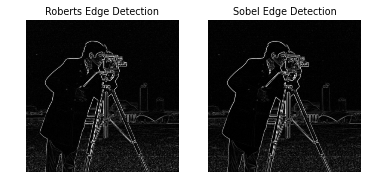

In [10]:
import matplotlib.pyplot as plt

from skimage.data import camera
from skimage.filter import roberts, sobel


image = camera()
edge_roberts = roberts(image)
edge_sobel = sobel(image)

fig, (ax0, ax1) = plt.subplots(ncols=2)

ax0.imshow(edge_roberts, cmap=plt.cm.gray)
ax0.set_title('Roberts Edge Detection')
ax0.axis('off')

ax1.imshow(edge_sobel, cmap=plt.cm.gray)
ax1.set_title('Sobel Edge Detection')
ax1.axis('off')

plt.show()

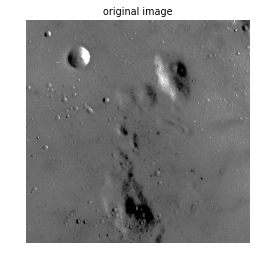

In [11]:
import matplotlib.pyplot as plt

from skimage import data
from skimage.exposure import rescale_intensity

image = data.moon()
# Rescale image intensity so that we can see dim features.
image = rescale_intensity(image, in_range=(50, 200))

# convenience function for plotting images
def imshow(image, **kwargs):
    plt.figure(figsize=(5, 4))
    plt.imshow(image, **kwargs)
    plt.axis('off')

imshow(image)
plt.title('original image')

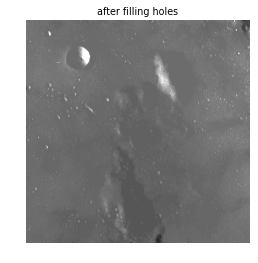

In [12]:
import numpy as np
from skimage.morphology import reconstruction

seed = np.copy(image)
seed[1:-1, 1:-1] = image.max()
mask = image

filled = reconstruction(seed, mask, method='erosion')

imshow(filled, vmin=image.min(), vmax=image.max())
plt.title('after filling holes')

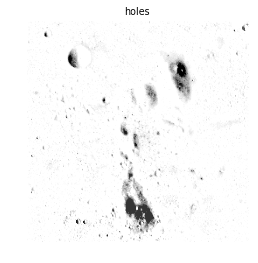

In [13]:
imshow(image - filled)
plt.title('holes')

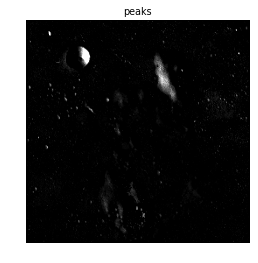

In [14]:
seed = np.copy(image)
seed[1:-1, 1:-1] = image.min()
rec = reconstruction(seed, mask, method='dilation')
imshow(image - rec)
plt.title('peaks')
plt.show()

In [15]:
from skimage.feature import daisy
from skimage import data
import matplotlib.pyplot as plt


img = data.camera()
descs, descs_img = daisy(img, step=180, radius=58, rings=2, histograms=6,
                         orientations=8, visualize=True)

plt.axis('off')
plt.imshow(descs_img)
descs_num = descs.shape[0] * descs.shape[1]
plt.title('%i DAISY descriptors extracted:' % descs_num)
plt.show()

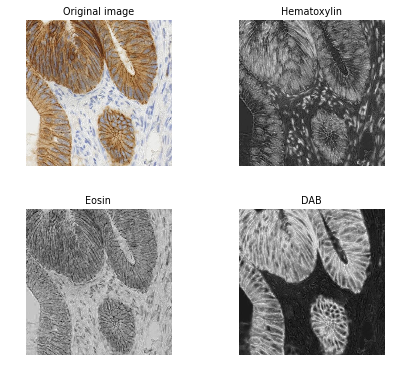

In [16]:
import matplotlib.pyplot as plt

from skimage import data
from skimage.color import rgb2hed


ihc_rgb = data.immunohistochemistry()
ihc_hed = rgb2hed(ihc_rgb)

fig, axes = plt.subplots(2, 2, figsize=(7, 6))
ax0, ax1, ax2, ax3 = axes.ravel()

ax0.imshow(ihc_rgb)
ax0.set_title("Original image")

ax1.imshow(ihc_hed[:, :, 0], cmap=plt.cm.gray)
ax1.set_title("Hematoxylin")

ax2.imshow(ihc_hed[:, :, 1], cmap=plt.cm.gray)
ax2.set_title("Eosin")

ax3.imshow(ihc_hed[:, :, 2], cmap=plt.cm.gray)
ax3.set_title("DAB")

for ax in axes.ravel():
    ax.axis('off')

fig.subplots_adjust(hspace=0.3)

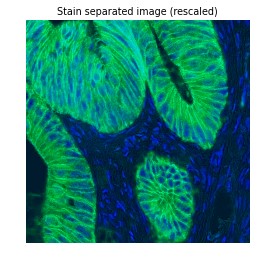

In [17]:
import numpy as np

from skimage.exposure import rescale_intensity

# Rescale hematoxylin and DAB signals and give them a fluorescence look
h = rescale_intensity(ihc_hed[:, :, 0], out_range=(0, 1))
d = rescale_intensity(ihc_hed[:, :, 2], out_range=(0, 1))
zdh = np.dstack((np.zeros_like(h), d, h))

plt.figure()
plt.imshow(zdh)
plt.title("Stain separated image (rescaled)")
plt.axis('off')
plt.show()

In [18]:
import numpy as np
import matplotlib.pyplot as plt

from skimage import data, img_as_float
from skimage.filter import denoise_tv_chambolle, denoise_bilateral


lena = img_as_float(data.lena())
lena = lena[220:300, 220:320]

noisy = lena + 0.6 * lena.std() * np.random.random(lena.shape)
noisy = np.clip(noisy, 0, 1)

fig, ax = plt.subplots(nrows=2, ncols=3, figsize=(8, 5))

plt.gray()

ax[0, 0].imshow(noisy)
ax[0, 0].axis('off')
ax[0, 0].set_title('noisy')
ax[0, 1].imshow(denoise_tv_chambolle(noisy, weight=0.1, multichannel=True))
ax[0, 1].axis('off')
ax[0, 1].set_title('TV')
ax[0, 2].imshow(denoise_bilateral(noisy, sigma_range=0.05, sigma_spatial=15))
ax[0, 2].axis('off')
ax[0, 2].set_title('Bilateral')

ax[1, 0].imshow(denoise_tv_chambolle(noisy, weight=0.2, multichannel=True))
ax[1, 0].axis('off')
ax[1, 0].set_title('(more) TV')
ax[1, 1].imshow(denoise_bilateral(noisy, sigma_range=0.1, sigma_spatial=15))
ax[1, 1].axis('off')
ax[1, 1].set_title('(more) Bilateral')
ax[1, 2].imshow(lena)
ax[1, 2].axis('off')
ax[1, 2].set_title('original')

fig.subplots_adjust(wspace=0.02, hspace=0.2,
                    top=0.9, bottom=0.05, left=0, right=1)

plt.show()

In [23]:
from skimage import data
from skimage import transform as tf
from skimage.feature import (match_descriptors, corner_peaks, corner_harris,  plot_matches, BRIEF)
from skimage.color import rgb2gray
import matplotlib.pyplot as plt


img1 = rgb2gray(data.lena())
tform = tf.AffineTransform(scale=(1.2, 1.2), translation=(0, -100))
img2 = tf.warp(img1, tform)
img3 = tf.rotate(img1, 25)

keypoints1 = corner_peaks(corner_harris(img1), min_distance=5)
keypoints2 = corner_peaks(corner_harris(img2), min_distance=5)
keypoints3 = corner_peaks(corner_harris(img3), min_distance=5)

extractor = BRIEF()

extractor.extract(img1, keypoints1)
keypoints1 = keypoints1[extractor.mask]
descriptors1 = extractor.descriptors

extractor.extract(img2, keypoints2)
keypoints2 = keypoints2[extractor.mask]
descriptors2 = extractor.descriptors

extractor.extract(img3, keypoints3)
keypoints3 = keypoints3[extractor.mask]
descriptors3 = extractor.descriptors

matches12 = match_descriptors(descriptors1, descriptors2, cross_check=True)
matches13 = match_descriptors(descriptors1, descriptors3, cross_check=True)

fig, ax = plt.subplots(nrows=2, ncols=1)

plt.gray()

plot_matches(ax[0], img1, img2, keypoints1, keypoints2, matches12)
ax[0].axis('off')

plot_matches(ax[1], img1, img3, keypoints1, keypoints3, matches13)
ax[1].axis('off')

plt.show()

ImportError: cannot import name match_descriptors

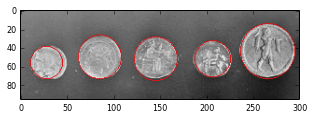

In [21]:
import numpy as np
import matplotlib.pyplot as plt

from skimage import data, filter, color
from skimage.transform import hough_circle
from skimage.feature import peak_local_max
from skimage.draw import circle_perimeter
from skimage.util import img_as_ubyte


# Load picture and detect edges
image = img_as_ubyte(data.coins()[0:95, 70:370])
edges = filter.canny(image, sigma=3, low_threshold=10, high_threshold=50)

fig, ax = plt.subplots(ncols=1, nrows=1, figsize=(5, 2))

# Detect two radii
hough_radii = np.arange(15, 30, 2)
hough_res = hough_circle(edges, hough_radii)

centers = []
accums = []
radii = []

for radius, h in zip(hough_radii, hough_res):
    # For each radius, extract two circles
    peaks = peak_local_max(h, num_peaks=2)
    centers.extend(peaks)
    accums.extend(h[peaks[:, 0], peaks[:, 1]])
    radii.extend([radius, radius])

# Draw the most prominent 5 circles
image = color.gray2rgb(image)
for idx in np.argsort(accums)[::-1][:5]:
    center_x, center_y = centers[idx]
    radius = radii[idx]
    cx, cy = circle_perimeter(center_y, center_x, radius)
    image[cy, cx] = (220, 20, 20)

ax.imshow(image, cmap=plt.cm.gray)

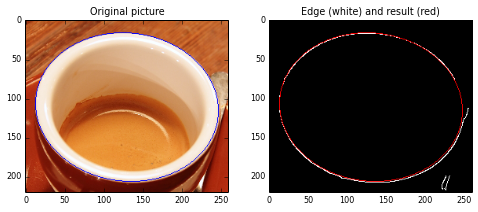

In [22]:
import matplotlib.pyplot as plt

from skimage import data, filter, color
from skimage.transform import hough_ellipse
from skimage.draw import ellipse_perimeter

# Load picture, convert to grayscale and detect edges
image_rgb = data.coffee()[0:220, 160:420]
image_gray = color.rgb2gray(image_rgb)
edges = filter.canny(image_gray, sigma=2.0,
                     low_threshold=0.55, high_threshold=0.8)

# Perform a Hough Transform
# The accuracy corresponds to the bin size of a major axis.
# The value is chosen in order to get a single high accumulator.
# The threshold eliminates low accumulators
result = hough_ellipse(edges, accuracy=20, threshold=250,
                       min_size=100, max_size=120)
result.sort(order='accumulator')

# Estimated parameters for the ellipse
best = result[-1]
yc = int(best[1])
xc = int(best[2])
a = int(best[3])
b = int(best[4])
orientation = best[5]

# Draw the ellipse on the original image
cy, cx = ellipse_perimeter(yc, xc, a, b, orientation)
image_rgb[cy, cx] = (0, 0, 255)
# Draw the edge (white) and the resulting ellipse (red)
edges = color.gray2rgb(edges)
edges[cy, cx] = (250, 0, 0)

fig2, (ax1, ax2) = plt.subplots(ncols=2, nrows=1, figsize=(8, 4))

ax1.set_title('Original picture')
ax1.imshow(image_rgb)

ax2.set_title('Edge (white) and result (red)')
ax2.imshow(edges)

plt.show()